# Obesity Risk Prediction

This project is based on the Kaggle competition [Multi-Class Prediction of Obesity Risk](https://kaggle.com/competitions/playground-series-s4e2).

**Goal:** The goal of this project is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

**Dataset:** The dataset was generated from a deep learning model trained on the [Obesity or CVD risk](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) dataset. 
The data consist of the estimation of obesity levels among individuals from Mexico, Peru and Columbia aged 14 to 61 with diverse eating habits and physical conditions. 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import data

In [44]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [45]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [46]:
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [47]:
df_train = df_train.drop(columns = "id")
df_test = df_test.drop(columns = "id")

In [48]:
# Shape of the datasets
print('Train dataset: ', df_train.shape)
print('Test dataset: ', df_test.shape)

Train dataset:  (20758, 17)
Test dataset:  (13840, 16)


### Variable description

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

The dataset contains :
+ 8 numeric variables : 
    + `Age`
    + `Height` in m
    + `Weight` in kg
    + `FCVC` : Frequency of consumption of vegetables
    + `NCP` : Number of main meals
    + `CH20` : Consumption of water daily
    + `FAF` : Physical activity frequency
    + `TUE` : Time using technology devices
+ 9 non numeric variables : 
    + `Gender` : Male/Female
    + `family_history_with_overweight` : Family members suffered or suffers from overweight 
    + `FAVC` : Frequent consumption of high caloric food  
    + `CAEC` :  Consumption of food between meals
    + `SMOKE` : Smoker or not
    + `SCC` : Calories consumption monitoring
    + `CALC` : Consumption of alcohol 
    + `MTRANS` : Transportation used 
    + `NObeyesdad` : the variable to predict (Underweight/Normal/Overweight I/Overweight II/Obesity I/Obesity II/Obesity III)

### Null values

In [50]:
df_train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [51]:
df_test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

There are no missing values in both the train and test datasets.

## Variable analysis

In [52]:
df_train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


### Target variable NObeyesdad

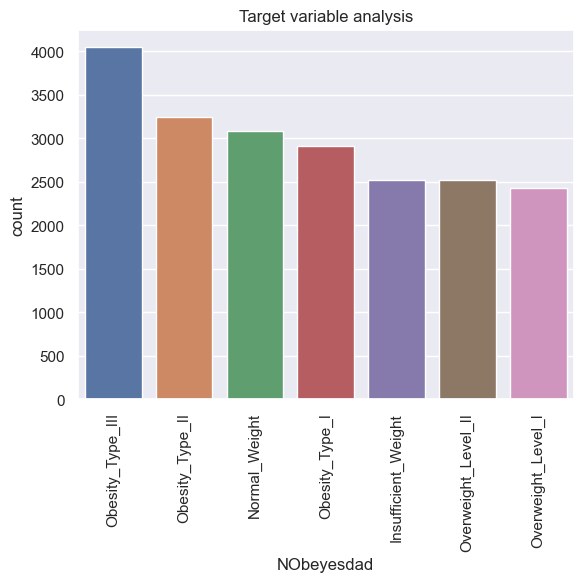

In [53]:
sns.set(style='darkgrid')
sns.countplot(x='NObeyesdad', data=df_train, order=df_train['NObeyesdad'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Target variable analysis")
plt.show()

Obesity_Type_III is the most frequent class in the dataset.

### Categorical variables

In [54]:
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

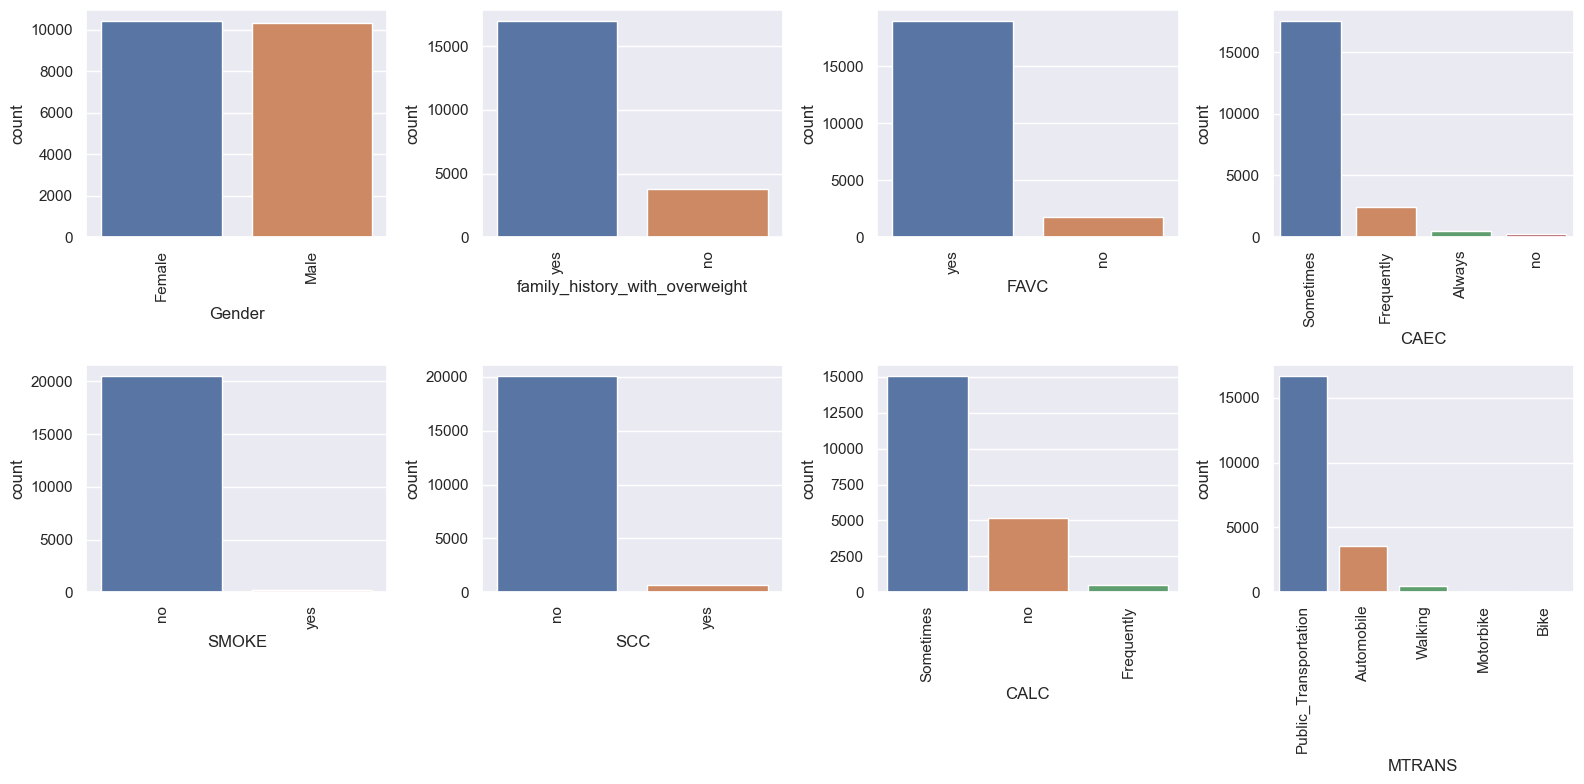

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()
for i, var in enumerate(categorical_cols):
    sns.countplot(x=var, data=df_train, order=df_train[var].value_counts().index, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90) 
plt.tight_layout()
plt.show()

The gender distribution is quite balanced. However, the other categorical variables are highly imbalanced. 

### Numeric variables

In [56]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

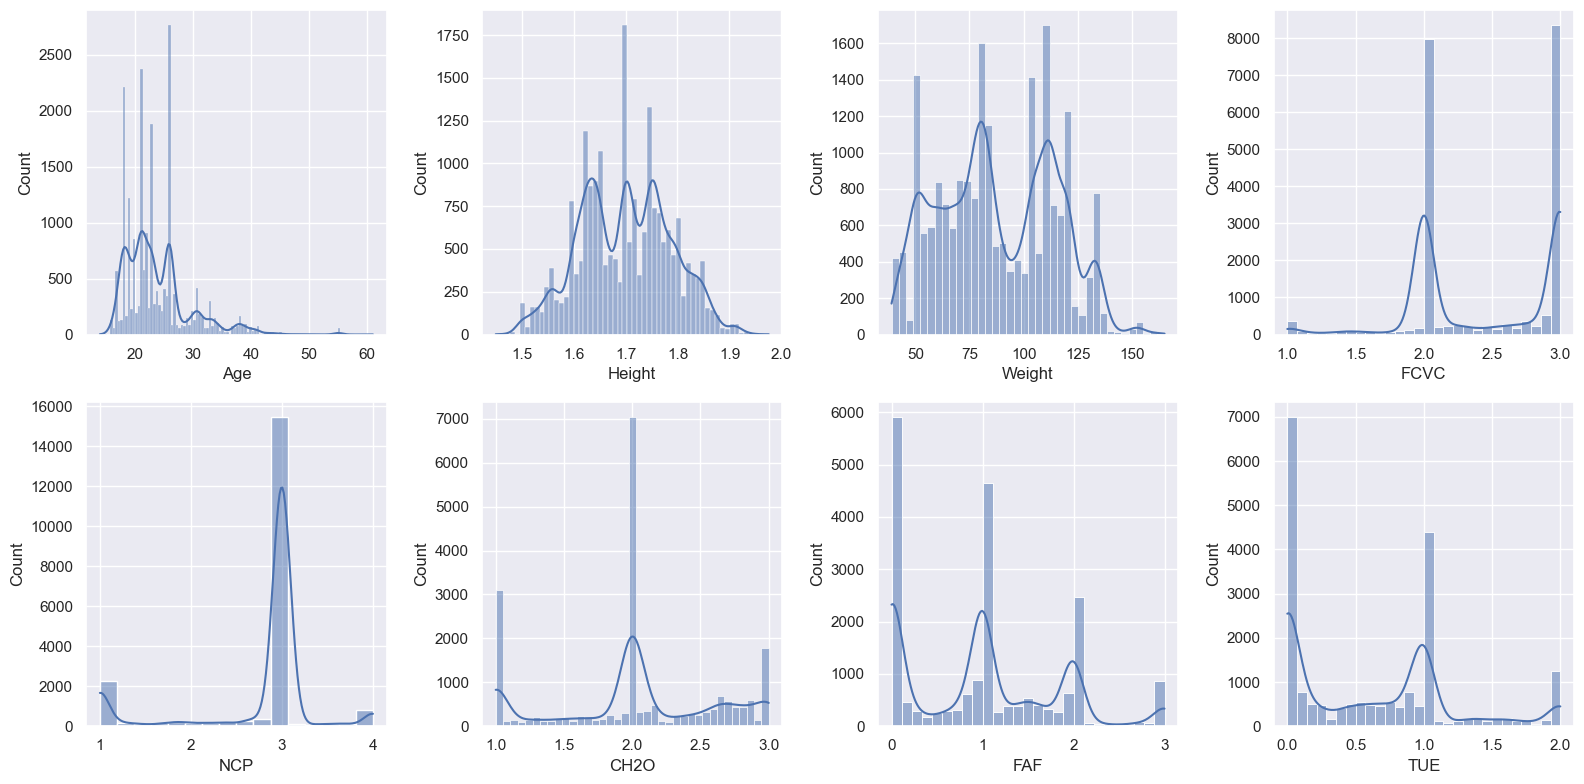

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()
for i, var in enumerate(numeric_cols):
    sns.histplot(x=var, data=df_train, kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

## Feature engineering

### Encode target and categorical variables

In [58]:
# Encode target variable
dict= {'Insufficient_Weight': 0,
       'Normal_Weight': 1,
       'Overweight_Level_I': 2,
       'Overweight_Level_II': 3, 
       'Obesity_Type_I': 4, 
       'Obesity_Type_II': 5, 
       'Obesity_Type_III': 6}
df_train['NObeyesdad']= df_train['NObeyesdad'].map(dict)

In [59]:
def encode_categorical(data):
    data['Gender']= data['Gender'].map({'Male': 0, 'Female': 1})
    data['family_history_with_overweight'] = data['family_history_with_overweight'].map({'yes': 1, 'no': 0})
    data['FAVC'] = data['FAVC'].map({'no': 0, 'yes': 1,})
    data["CAEC"] = data["CAEC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})
    data['SMOKE'] = data['SMOKE'].map({'no': 0, 'yes': 1,})
    data['SCC'] = data['SCC'].map({'no': 0, 'yes': 1,})
    data["CALC"] = data["CALC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})
    data["MTRANS"] = data["MTRANS"].map({"Public_Transportation": 0, "Automobile": 1, "Walking": 2, "Motorbike": 3, "Bike": 4})
    return data

In [60]:
df_train = encode_categorical(df_train)
df_test = encode_categorical(df_test)

### Create new features

* `BMI` = Weight / (Height **2) [Body Mass Index]
* `WIR` = Weight / CH2O [Water Intake Ratio = Weight / Consumption of water daily]
* `STR` = FAF / TUE [Sedentary Time Tatio = Physical activity frequency / Time using technology devices]

In [65]:
def create_new_features(data):
    # BMI
    data['BMI'] = data['Weight'] / (data['Height'] ** 2)
    # Water Intake Ratio
    data['WIR'] = data['Weight'] / data['CH2O']
    # Sedentary Time Tatio
    data['STR'] = data['FAF'] / data['TUE']
    return data

In [66]:
df_train = create_new_features(df_train)
df_test = create_new_features(df_test)

In [67]:
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,WIR,STR
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,0,3,28.259565,29.552304,0.000000
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,1,1,23.422091,28.500000,1.000000
2,1,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,0,0,17.126706,26.259596,0.517479
3,1,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,0,6,44.855798,78.417006,1.881396
4,0,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,0,3,25.599151,47.376392,2.112191


## Exploratory data analysis

### Correlations

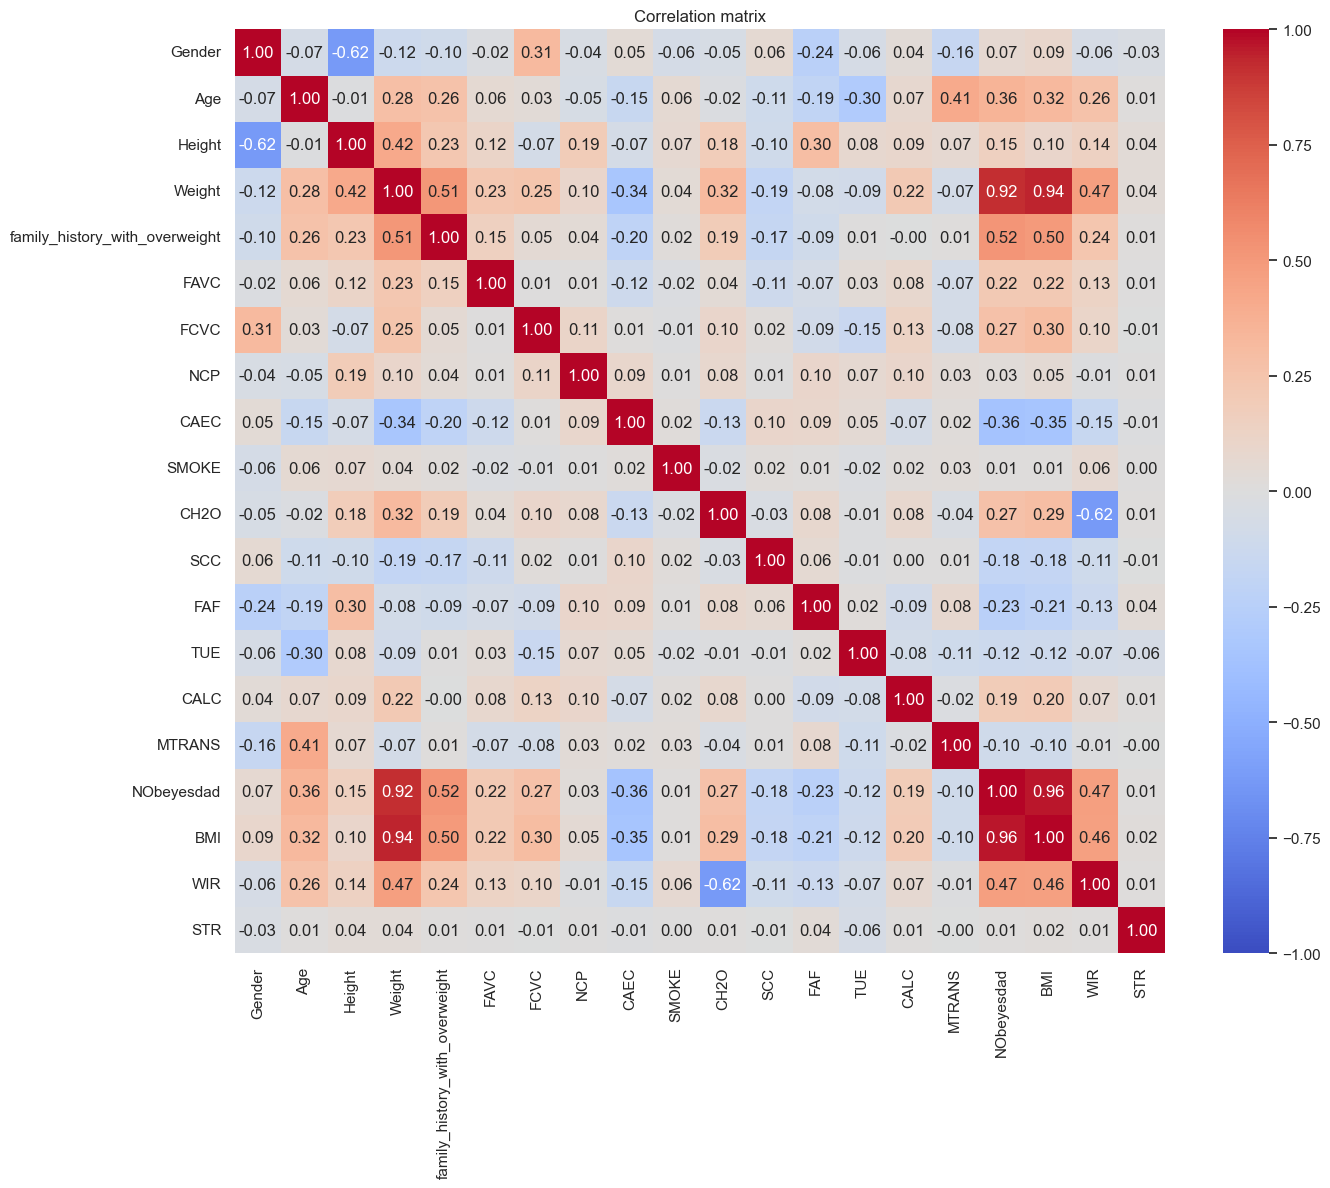

In [68]:
plt.figure(figsize=(15, 12))
corr_matrix=df_train.corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt = ".2f", cmap = "coolwarm")
plt.title('Correlation matrix')
plt.show()